In [4]:
import pandas as pd

path = "data/mrbeast_comments.csv"

# Try to read ignoring bad lines
try:
    df = pd.read_csv(path, on_bad_lines='skip', encoding='utf-8')
    print("Loaded successfully after skipping problematic lines.")
    print("Shape:", df.shape)
    display(df.head(5))
except Exception as e:
    print("Error loading CSV:", e)


Loaded successfully after skipping problematic lines.
Shape: (6802, 2)


,Comment,Sentiment
0,Achieving million views in days is dangerous,Positive
1,How many people here want to participate in su...,Neutral
2,Mrbeast is slowly turning into mrjigsaw,Negative
3,genuinely can't believe how dystopian this is,Negative
4,Have of the worlds smartest people compete in ...,Neutral


In [5]:
print("Columns:", df.columns.tolist())
print("\nData types & missing values:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nSentiment distribution:")
print(df['Sentiment'].value_counts(normalize=True) * 100)
dupes = df.duplicated(subset='Comment').sum()
print(f"\nDuplicate comments: {dupes}")

df['text_length'] = df['Comment'].apply(lambda x: len(str(x)))
print("\nAverage comment length:", df['text_length'].mean())
print("Max comment length:", df['text_length'].max())

print("\nShortest comment:")
print(df.loc[df['text_length'].idxmin(), 'Comment'])
print("\nLongest comment:")
print(df.loc[df['text_length'].idxmax(), 'Comment'])

Columns: ['Comment', 'Sentiment']

Data types & missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6802 entries, 0 to 6801
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    6797 non-null   object
 1   Sentiment  6802 non-null   object
dtypes: object(2)
memory usage: 106.4+ KB
None

Missing values per column:
Comment      5
Sentiment    0
dtype: int64

Sentiment distribution:
Sentiment
Positive    68.935607
Neutral     29.888268
Negative     1.161423
 Neutral     0.014702
Name: proportion, dtype: float64

Duplicate comments: 4979

Average comment length: 45.296677447809465
Max comment length: 294

Shortest comment:
:

Longest comment:
I had calculated by weight, static friction and force required that it would take about strong men to beat the kids. But then again I spent years studying medicine lol. Yeah there was no way men were taking a victory here. No matter how strong. Either way I loved thi

In [6]:
!pip install stopwords

In [7]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_comment(text):
    if pd.isnull(text):
        return ""
    text = text.lower()                              
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  
    text = re.sub(r'@\w+|\#','', text)               
    text = re.sub(r'\d+', '', text)                  
    text = re.sub(r'[^\x00-\x7F]+', '', text)        
    text = text.translate(str.maketrans('', '', string.punctuation))  
    text = re.sub(r'(.)\1{2,}', r'\1', text)         
    text = re.sub(r'\s+', ' ', text).strip()         
    text = " ".join([word for word in text.split() if word not in stop_words])  
    return text

df = df.dropna(subset=['Comment']).drop_duplicates(subset=['Comment'])
df['clean_text'] = df['Comment'].apply(clean_comment)

print("After cleaning:")
print(df[['Comment', 'clean_text']].head(5))
print("\nShape after cleaning:", df.shape)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...


After cleaning:
                                             Comment  \
0       Achieving million views in days is dangerous   
1  How many people here want to participate in su...   
2            Mrbeast is slowly turning into mrjigsaw   
3      genuinely can't believe how dystopian this is   
4  Have of the worlds smartest people compete in ...   

                                          clean_text  
0             achieving million views days dangerous  
1            many people want participate challenges  
2                    mrbeast slowly turning mrjigsaw  
3                   genuinely cant believe dystopian  
4  worlds smartest people compete series intellec...  

Shape after cleaning: (1822, 4)


[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
!pip install wordcloud

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3568\3135052213.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


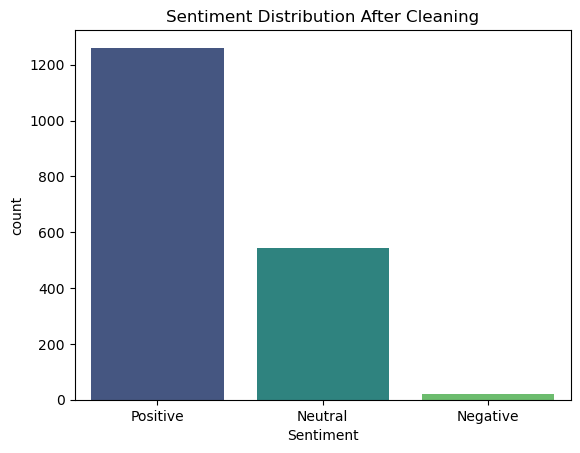

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3568\3135052213.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words_df, palette='crest')


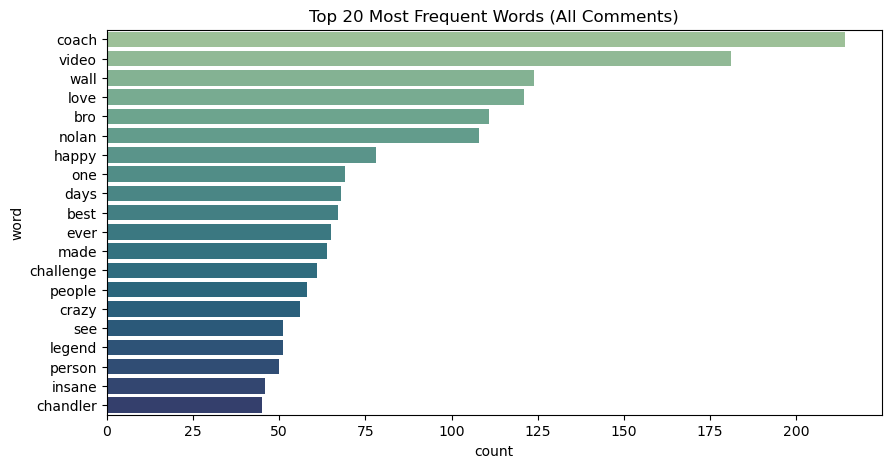

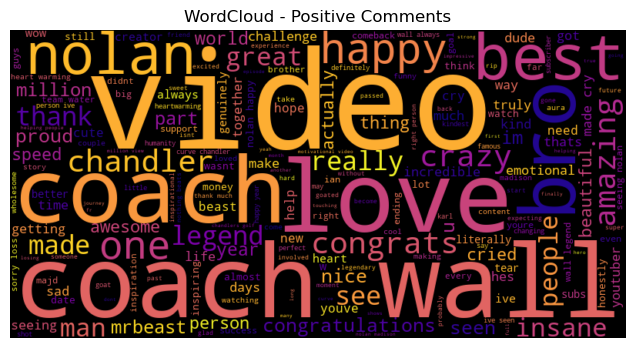

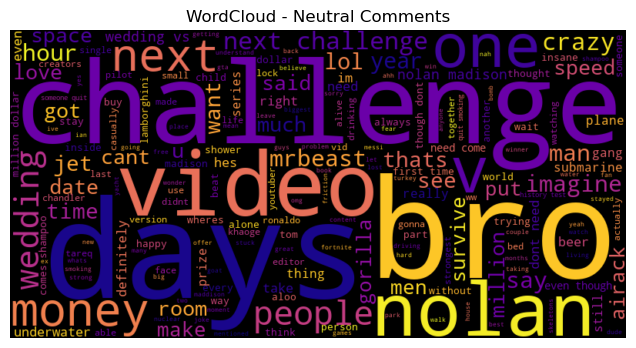

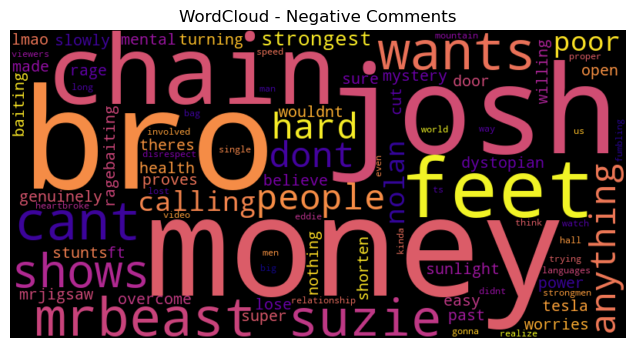

In [10]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title("Sentiment Distribution After Cleaning")
plt.show()

all_words = " ".join(df['clean_text']).split()
most_common = Counter(all_words).most_common(20)

top_words_df = pd.DataFrame(most_common, columns=['word', 'count'])
plt.figure(figsize=(10,5))
sns.barplot(x='count', y='word', data=top_words_df, palette='crest')
plt.title("Top 20 Most Frequent Words (All Comments)")
plt.show()

for sentiment in df['Sentiment'].unique():
    subset = df[df['Sentiment'] == sentiment]
    text = " ".join(subset['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(text)
    plt.figure(figsize=(10,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - {sentiment} Comments")
    plt.show()


Accuracy: 0.8027397260273973

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.65      0.74      0.69       108
    Positive       0.88      0.84      0.86       253

    accuracy                           0.80       365
   macro avg       0.51      0.53      0.52       365
weighted avg       0.80      0.80      0.80       365



D:\ana\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ana\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ana\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


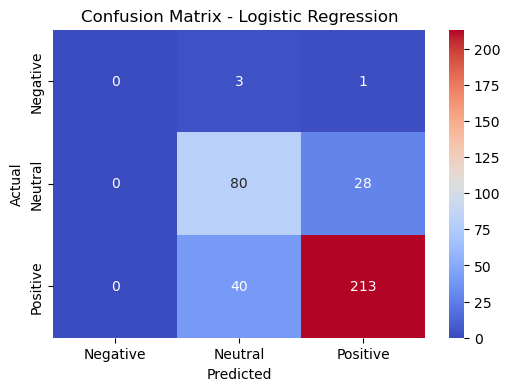

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df['clean_text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_tfidf, y_train)

y_pred = lr.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


D:\ana\Lib\site-packages\xgboost\training.py:199: UserWarning: [03:02:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy (Ensemble): 0.8
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.66      0.72      0.69       108
    Positive       0.87      0.85      0.86       253

    accuracy                           0.80       365
   macro avg       0.51      0.52      0.51       365
weighted avg       0.80      0.80      0.80       365



D:\ana\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ana\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ana\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


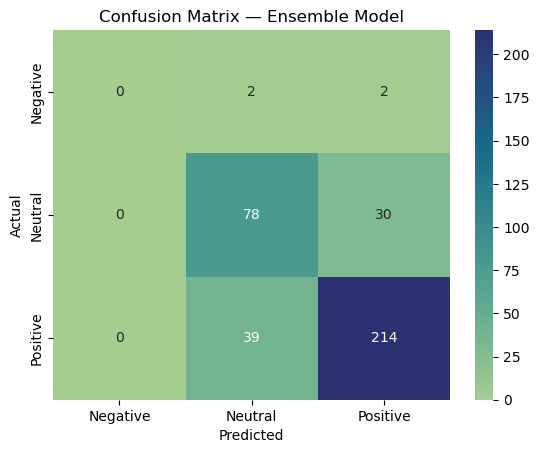

In [12]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced_subsample')
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=6, eval_metric='mlogloss', use_label_encoder=False)

ensemble = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('xgb', xgb)],
    voting='soft'
)

ensemble.fit(X_train_tfidf, y_train)
y_pred_ens = ensemble.predict(X_test_tfidf)

print("Accuracy (Ensemble):", accuracy_score(y_test, y_pred_ens))
print(classification_report(y_test, y_pred_ens))

cm = confusion_matrix(y_test, y_pred_ens)
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', xticklabels=ensemble.classes_, yticklabels=ensemble.classes_)
plt.title("Confusion Matrix — Ensemble Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
# !pip install tensorflow keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

MAX_WORDS = 8000
MAX_LEN = 100

# Tokenize text
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])
X_seq = tokenizer.texts_to_sequences(df['clean_text'])
X_pad = pad_sequences(X_seq, maxlen=MAX_LEN, padding='post')

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(df['Sentiment'])
y_cat = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_cat, test_size=0.2, random_state=42, stratify=y_cat)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

model = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_LEN),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


D:\ana\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ embedding (Embedding)         │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ bidirectional (Bidirectional) │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout (Dropout)             │ ?                     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ ?                     │  0 (unbuilt) │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_1 (Dropout)           │ ?                     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ ?                     │  0 (unbuilt) │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9847 - loss: 0.0531 - val_accuracy: 0.8082 - val_loss: 0.8959
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9878 - loss: 0.0439 - val_accuracy: 0.8014 - val_loss: 0.9951
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9901 - loss: 0.0364 - val_accuracy: 0.7945 - val_loss: 1.0872
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9908 - loss: 0.0265 - val_accuracy: 0.7740 - val_loss: 1.1647
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9939 - loss: 0.0236 - val_accuracy: 0.7603 - val_loss: 1.0891
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9939 - loss: 0.0225 - val_accuracy: 0.7740 - val_loss: 1.2930
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9962 - loss: 0.0135 - val_accuracy: 0.7740 - val_loss: 1.3594
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9985 - loss: 0.0083 - val_accuracy: 0.7671 - v

In [18]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Bi-LSTM Test Accuracy: {acc:.3f}")


Bi-LSTM Test Accuracy: 0.858


In [19]:
from lime.lime_text import LimeTextExplainer
import numpy as np

In [21]:
class_names = list(le.classes_)

def predict_proba_lime(texts):
    seqs = tokenizer.texts_to_sequences(texts)
    pad = pad_sequences(seqs, maxlen=MAX_LEN, padding='post')
    return model.predict(pad)

explainer = LimeTextExplainer(class_names=class_names)

In [22]:
i = np.random.randint(0, len(X_test))
sample_text = df.iloc[i]['clean_text']
print("Comment:", sample_text)

exp = explainer.explain_instance(sample_text, predict_proba_lime, num_features=8, labels=[0,1,2])
exp.show_in_notebook(text=True)

Comment: holy refresh pull
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
